# Programming Assignment
### Task 1
**Computing Summary Statistics**: A sketch summary is a technique for computing summary stats of data in a quick way.
Compute the sketch summary of the lavel column of the training dataset.


In [1]:
import turicreate as tc

In [2]:
image_data = tc.SFrame('../data/image_train_data')
image_data.column_names()

['id', 'image', 'label', 'deep_features', 'image_array']

In [3]:
sketch = tc.Sketch(image_data['label'])

In [4]:
sketch # the least common category is bird


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [53]:
image_data['label'].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


## Task 2
**Create category-specific Image Retrieval Models**: In most retrieval tasks, data is unlabeled -- it is an unsupervised learning problem.

Our dataset however is conveniently labeled so we can use this to separate the retrieval models according to category. This way we won't show an ostrich image when querying for a car.

1. Split the data into 4 substructures. Use logical filters.
2. Create a nearest neighbor model for each category. 
3. Create a query function that shows the result images for each substructure.

In [5]:
cat_images = image_data[image_data['label'] == 'cat']
len(cat_images)

509

In [6]:
dog_images = image_data[image_data['label'] == 'dog']
len(dog_images)

509

In [7]:
car_images = image_data[image_data['label'] == 'automobile']
len(car_images)

509

In [8]:
bird_images = image_data[image_data['label'] == 'bird']
len(bird_images)

478

Create a nearest neighbor model using deep features. 
For each category, using the corresponding subset of the training data. 

In [9]:
cat_model = tc.nearest_neighbors.create(cat_images,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [10]:
dog_model = tc.nearest_neighbors.create(dog_images,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

In [11]:
car_model = tc.nearest_neighbors.create(car_images,
                                       features=['deep_features'],
                                       label='id')

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [12]:
bird_model = tc.nearest_neighbors.create(bird_images,
                                       features=['deep_features'],
                                       label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

### Create utility functions for querying the models
We know have four different models, each can find the closest dog, cat, automobile or bird to the given image.

For the first cat image in the test data, 
- What is the nearest cat-labeled image in the training data to the cat image that is the first image in the test data ?
- What is the nearest dog-labeled image in the training data to the cat image that is the first image in the test data?

In [24]:
image_test = tc.SFrame('../data/image_test_data')

In [14]:
def show_neighbors(i, images, model):
    query_result = model.query(images[i:i+1])
    result_images = images.filter_by(query_result['reference_label'],'id')
    result_images['image'].explore()
    return query_result


In [67]:
# We will query the models using the first image of the whole train set.
# for some unknown bug, `show_neighbors` does not work with image_test[0]
closest_cats = cat_model.query(image_test[0:1])
closest_cats

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.822ms      |

| Done         |         | 100         | 39.289ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


,SArray
0,

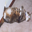

In [73]:
image_data[image_data['id']==16289]['image'].explore()

In [77]:
closest_dogs = dog_model.query(image_test[0:1])


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 7.939ms      |

| Done         |         | 100         | 33.44ms      |

+--------------+---------+-------------+--------------+

**NOTE: reference_label provides row ID of model's training data index**

In [78]:
closest_dogs

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

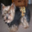

In [80]:
image_data[image_data['id']==16976]['image'].explore()

## Task 3
**Try an example of Nearest-neighbors classification**: You will use the distances computed by the KNN model to calculate the average distance.

1. For the first image in the test set `image_test`, compute the mean distance between this image at its 5 nearest neighbors labeled *cat* in the train set
2. For the same image, compute mean distance with its 5-nearest-neighbors labeled *dog* in the train set.

With this information, is the image closer to the cats or to the dogs?

In [84]:
avg_dog_distance = closest_dogs.groupby("query_label",
...            {'distance_mean':tc.aggregate.MEAN('distance')})
print(avg_dog_distance)

+-------------+-------------------+
| query_label |   distance_mean   |
+-------------+-------------------+
|      0      | 37.77071136184157 |
+-------------+-------------------+
[1 rows x 2 columns]



In [83]:
avg_cat_distance = closest_cats.groupby("query_label",
...            {'distance_mean':tc.aggregate.MEAN('distance')})
print(avg_cat_distance)

+-------------+-------------------+
| query_label |   distance_mean   |
+-------------+-------------------+
|      0      | 36.15573070978294 |
+-------------+-------------------+
[1 rows x 2 columns]



,SArray
0,

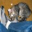

In [34]:
image_test[0:1]['image'].explore()

## Task 4. 
**Compute Nearest Neighbors Accuracy with Test Data**: 
We will measure the accuracy for a 1-nearest-neighbor model for each of the four catgeories.

A NN classifier predicts the label of a point in hyperplane as the most common (frequent) label of its K neighbors. The simplest KNN classifier is a 1-nearest-neighbor classifier.

1. Split the Test Data into the four categories. 
2. For each part of the test set, find nearest neighbors in the training set. (We can query not just a single image, but a set of images).

The input image's index is stored in `query_label` column.

3. Using this knowledge, find the closest neighbor to the `image_test_dog` data using each of the trained models.

In [35]:
image_test_cat = image_test[image_test['label'] == 'cat']
image_test_dog = image_test[image_test['label'] == 'dog']
image_test_car = image_test[image_test['label'] == 'automobile']
image_test_bird = image_test[image_test['label'] == 'bird']

In [36]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 315.225ms    |

| Done         | 509000  | 100         | 337.745ms    |

+--------------+---------+-------------+--------------+

In [37]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 334.995ms    |

| Done         | 509000  | 100         | 365.242ms    |

+--------------+---------+-------------+--------------+

In [38]:
dog_car_neighbors = car_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 289.69ms     |

| Done         | 509000  | 100         | 320.209ms    |

+--------------+---------+-------------+--------------+

In [39]:
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 59000   | 12.3431     | 293.057ms    |

| Done         | 478000  | 100         | 303.487ms    |

+--------------+---------+-------------+--------------+

4. Next we will create an SFrame for the distances from dog to each of the respective categories in the `image_data` training set.

The question is How many of the dog images from test_set are closer to a dog in train_set than a cat, automobile, or bird?

### How many of the test set dog images are closer to a dog in the training set than to a cat, automobile, or bird?

In [40]:
dog_distances = tc.SFrame()

In [41]:
dog_distances['dog-dog'] = dog_dog_neighbors['distance']

In [42]:
dog_distances['dog-cat'] = dog_cat_neighbors['distance']

In [43]:
dog_distances['dog-car'] = dog_car_neighbors['distance']

In [44]:
dog_distances['dog-bird'] = dog_bird_neighbors['distance']

In [45]:
dog_distances

dog-dog,dog-cat,dog-car,dog-bird
33.47735903726335,36.419607706754384,41.95797614571203,41.75386473035126
32.84584956840554,38.83532688735542,46.00213318067788,41.3382958924861
35.03970731890584,36.97634108541546,42.946229069238804,38.615759085289056
33.90103276968193,34.575007291446106,41.68660600484793,37.08922699538214
37.484925090925636,34.77882479101661,39.22696649347584,38.27228869398105
34.94516534398124,35.11715782924591,40.58451176980721,39.146208923590486
39.095727834463545,40.60958309132649,45.10673529610854,40.523040105962316
37.76961310322034,39.90368673062214,41.32211409739762,38.19479183926956
35.10891446032838,38.067470016821176,41.82446549950164,40.156713166131446
43.242283258453455,42.72587329506032,45.497692940110376,45.55979626027668


### Compute the number of correct predictions of 1-NN model
Use the `apply` method on the `dog_distances` SFrame to iterate over the rows and compute the number of `image_test_dog` examples where the distance to nearest dog image was less than all 3 other classes. (it was really the closest neighbor).

In [48]:
def is_dog_correct(row):
    # Recieves an SArray or row from dog_distances
    # Returns 1 if the closest neighbor (min distance) is the dog-labeled image
    d_dog = row['dog-dog']
    for col in dog_distances.column_names():
        if row[col] < d_dog:
            return 0
    return 1

In [49]:
correct_predictions = dog_distances.apply(is_dog_correct)

In [81]:
correct_predictions.sum()/len(dog_distances)

0.678